<h1>1. Выбор данных</h1>

Abalone Data Set - http://archive.ics.uci.edu/ml/datasets/Abalone


<h1>2. Импорт библиотек</h1>

In [232]:
# Импортируем необходимые библиотеки для анализа данных

# Библиотеки работы с данными
import pandas as pd
import numpy as np

# Библиотки визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка графиков
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams.update({'font.size': 18})

# Библиотека машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing

<h1>3. Описание данных</h1>

Предсказание возраста морского ушка (моллюски) по физическим измерениям. Возраст морского ушка определяется путем разрезания раковины через конус, окрашивания ее и подсчета количества колец под микроскопом - скучная и трудоемкая задача. Другие измерения, которые легче получить, используются для прогнозирования возраста. Для решения проблемы может потребоваться дополнительная информация, такая как погодные условия и местоположение (следовательно, наличие продуктов питания).

**Название / Тип Данных / Единица измерения / Описание**

* Sex - Пол / номинальный / -- / M (мужчина), F (женщина) и I (младенец)
* Length - Длина / непрерывная / мм / Измерение самой длинной оболочки
* Diameter - Диаметр / непрерывный / мм / перпендикулярный длине
* Height - Высота / непрерывная / мм / с мясом в скорлупе
* Whole_weight - Весь вес / непрерывный / грамм / целое морское ушко
* Shucked_weight - Очищенный вес / непрерывный / грамм / вес мяса
* Viscera_weight - Вес внутренних органов / непрерывный / грамм / вес кишечника (после кровотечения)
* Shell_weight - Вес скорлупы / непрерывный / грамм / после сушки
* Rings - Кольца / целое число / -- / +1.5 дает возраст в годах

In [233]:
# Импортируем данные
names = [
    'Sex', 'Length', 'Diameter',
    'Height', 'Whole_weight', 'Shucked_weight',
    'Viscera_weight', 'Shell_weight', 'Rings'
]

df = pd.read_csv('abalone.csv', names=names)
df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [234]:
df['Whole_weight_class'] = np.where(df.Whole_weight > 1, 1, 0)

In [235]:
df.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Whole_weight_class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


<h1>4. Подготовка данных</h1>

In [236]:
df.info() # пропущенных данных нет; неверно интерпретирвоанных данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 4177 non-null   object 
 1   Length              4177 non-null   float64
 2   Diameter            4177 non-null   float64
 3   Height              4177 non-null   float64
 4   Whole_weight        4177 non-null   float64
 5   Shucked_weight      4177 non-null   float64
 6   Viscera_weight      4177 non-null   float64
 7   Shell_weight        4177 non-null   float64
 8   Rings               4177 non-null   int64  
 9   Whole_weight_class  4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


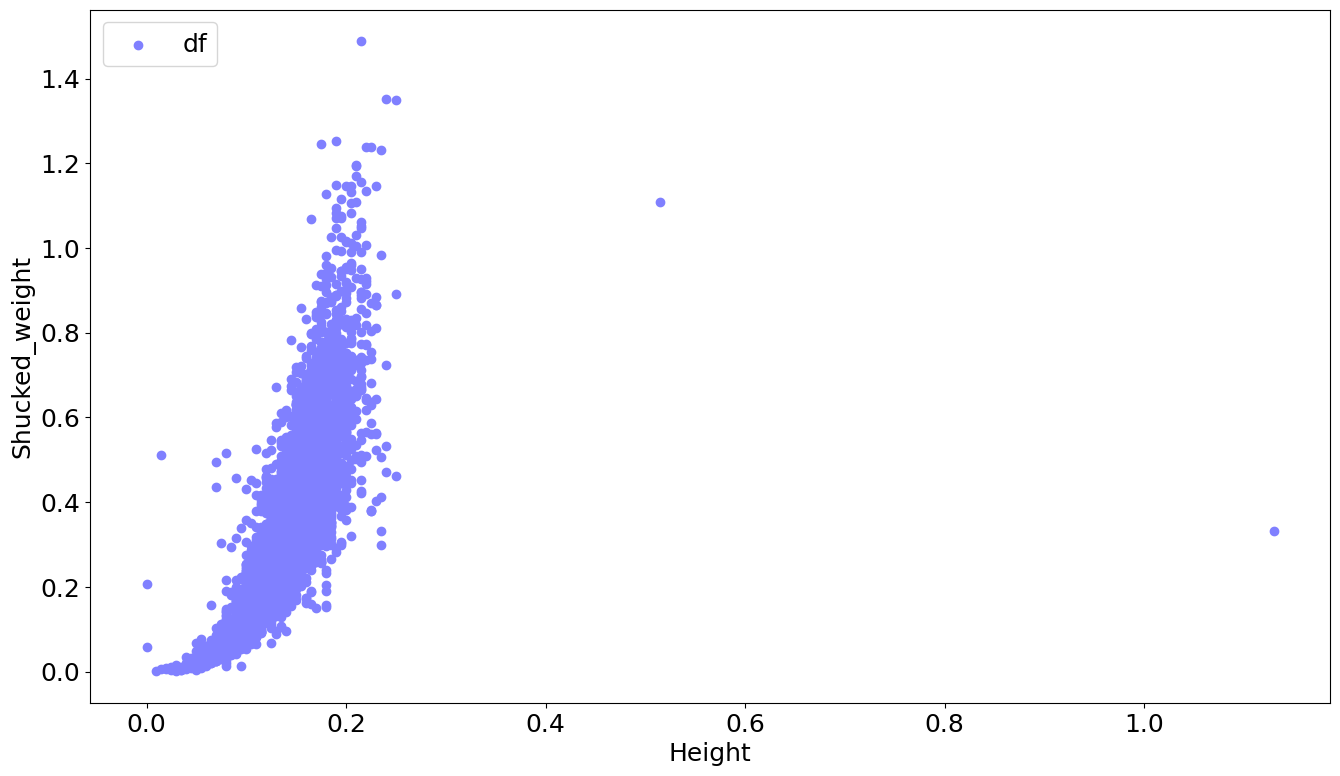

In [237]:
fig, ax = plt.subplots()
ax.scatter(df.Height, df.Shucked_weight, label='df', c='#8080ff')
ax.set_xlabel('Height')
ax.set_ylabel('Shucked_weight')
plt.legend(loc='upper left')

Видно, что имеется два выброса в тестовой выборке - удалим их

In [238]:
df = df.drop(index=list(df.query("Height>0.4").index))

<h1>5. Матрица корреляции</h1>

<Axes: >

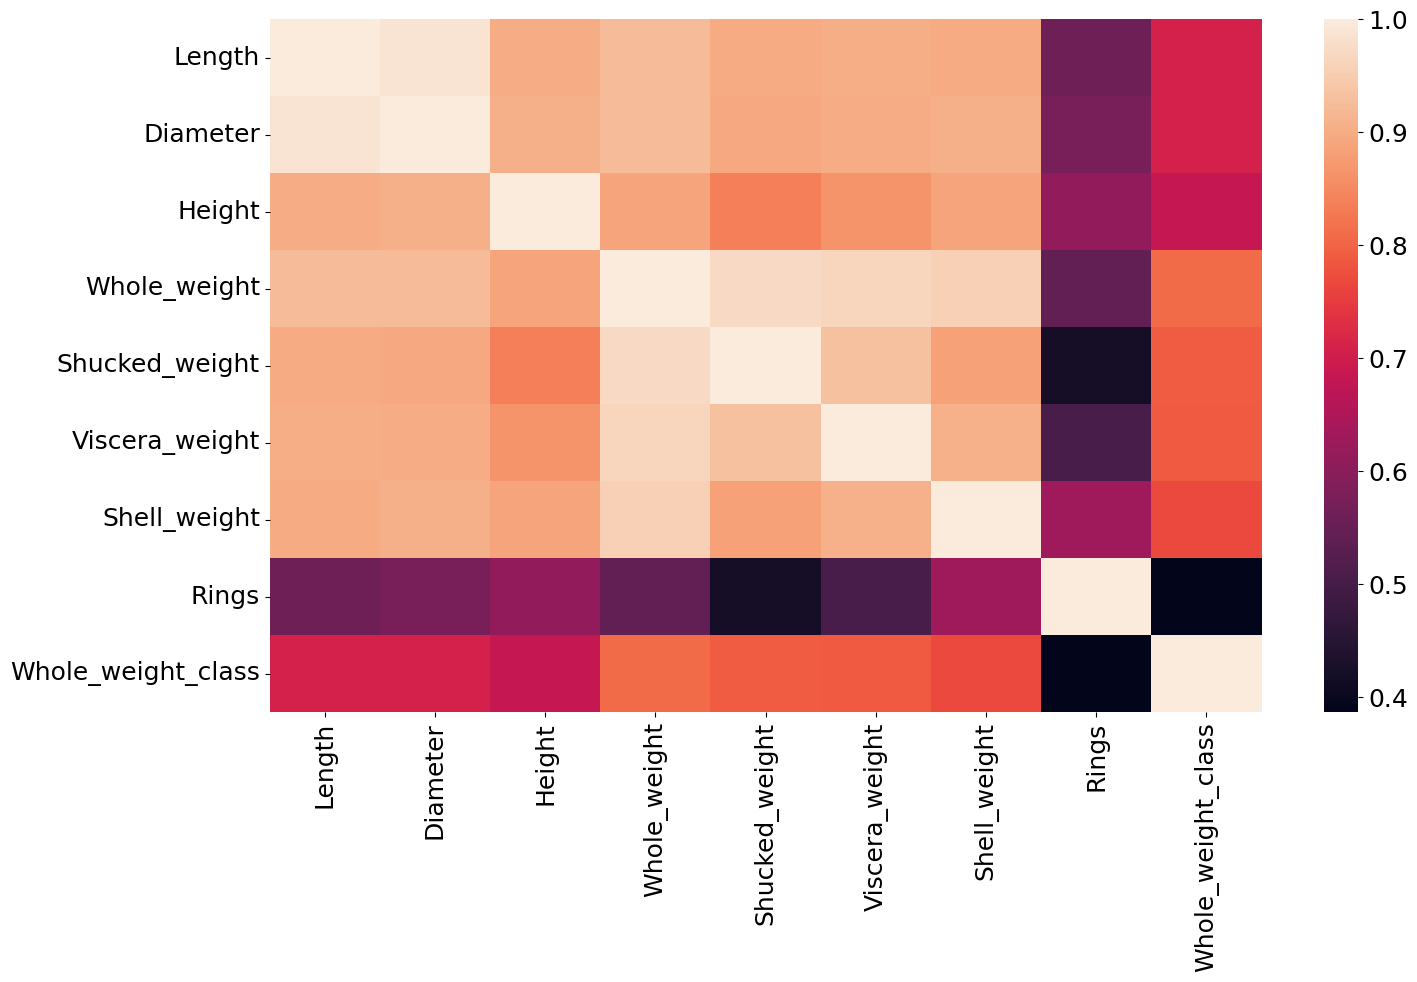

In [239]:
sns.heatmap(data=df.corr(numeric_only=True))
# Height, Shucked_weight - берем за факторы
# Whole_weight - берем за переменную отклика

In [240]:
X, y = df[['Height', 'Shucked_weight']].values, df['Whole_weight_class']

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
df[['Height', 'Shucked_weight', 'Whole_weight_class']].head(5)


,Height,Shucked_weight,Whole_weight_class
0,0.095,0.2245,0
1,0.090,0.0995,0
2,0.135,0.2565,0
3,0.125,0.2155,0
4,0.080,0.0895,0


In [242]:
print(f"Общий размер данных факторов: {X.shape}")
print(f"Общий размер данных переменной отклика: {y.shape}.")
print()
print(f"Размер тренировочных данных факторов: {X_train.shape}")
print(f"Размер тренировочных данных переменной отклика:{y_train.shape}")
print()
print(f"Размер тестовых данных факторов: {X_test.shape}")
print(f"Размер тестовых данных переменной отклика:{y_test.shape}")

# проверка на корректность разделения данных
assert X.shape[0] == X_train.shape[0] + X_test.shape[0]
assert y.shape[0] == y_train.shape[0] + y_test.shape[0]

Общий размер данных факторов: (4175, 2)
Общий размер данных переменной отклика: (4175,).

Размер тренировочных данных факторов: (2505, 2)
Размер тренировочных данных переменной отклика:(2505,)

Размер тестовых данных факторов: (1670, 2)
Размер тестовых данных переменной отклика:(1670,)


<Axes: xlabel='Height', ylabel='Shucked_weight'>

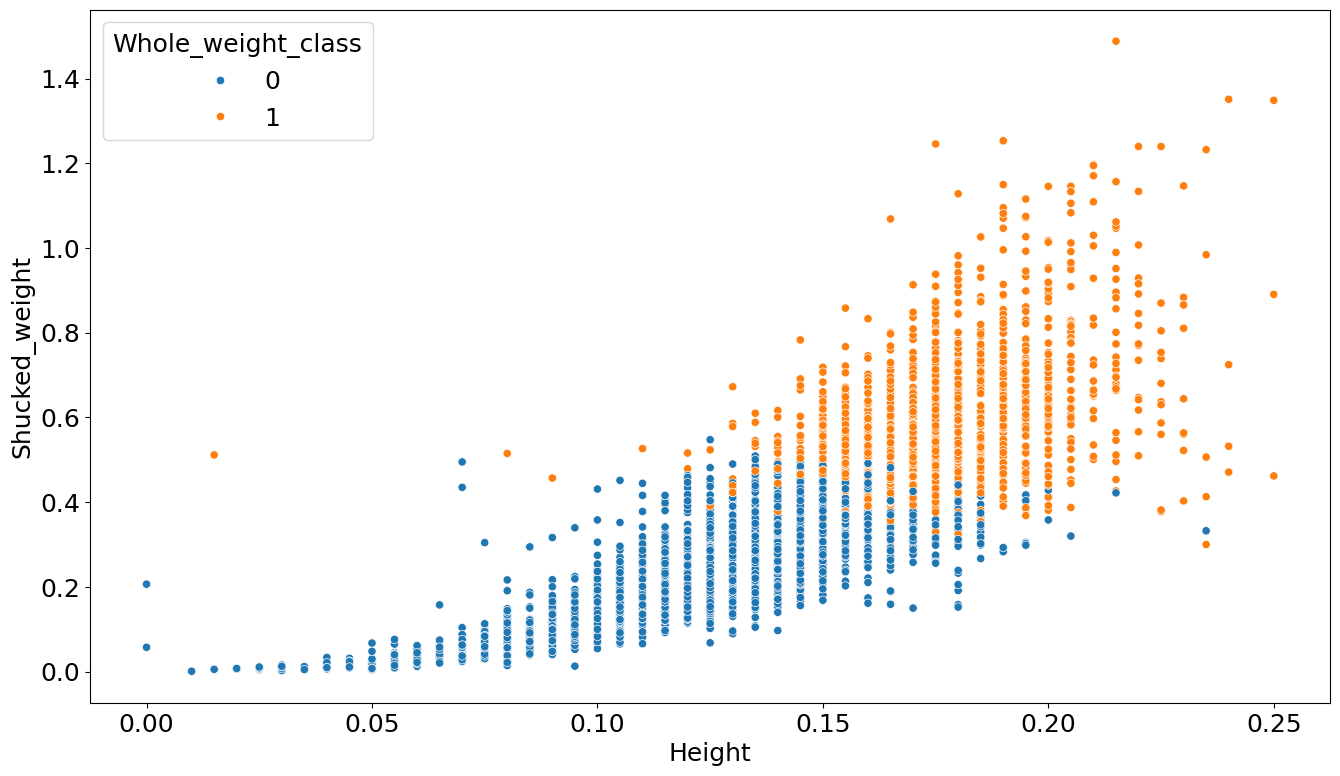

In [243]:
sns.scatterplot(data=df, x='Height', y='Shucked_weight', hue='Whole_weight_class')

In [244]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

def initialize_parameters_deep(layer_dims):
    parameters = {}
    L = len(layer_dims)            # number of layers in the network
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    return parameters

def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    return Z, cache

def linear_activation_forward(A_prev, W, b):
    # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = sigmoid(Z)
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    return A, cache

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    # Implement [LINEAR -> SIGMOID]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W"+str(l)], parameters["b"+str(l)])
        caches.append(cache)
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters["W"+str(L)], parameters["b"+str(L)])
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
    return AL, caches

def compute_cost(AL, Y):
    m = Y.shape[1]
#    cost = -1/m * np.sum(Y.astype(np.int64) * np.log(AL.astype(np.int64)) + (1-Y.astype(np.int64)) * np.log(1-AL.astype(np.int64)))
    cost = -1/m * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL))

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g.this turns [[17]] into 17).
    assert(cost.shape == ())
    return cost

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1/m * np.dot(dZ, A_prev.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    dZ = sigmoid_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    # Initializing the backpropagation
    #dAL = - (np.divide(Y.astype(np.int64), AL.astype(np.int64)) - np.divide(1 - Y.astype(np.int64), 1 - AL.astype(np.int64)))
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
  
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs:"grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
   # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (SIGMOID -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)]
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, "sigmoid")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network
    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
    return parameters 

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []                         # keep track of cost
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: [LINEAR -> SIGMOID]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        # Compute cost.
        cost = compute_cost(AL, Y)
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters

def predict(X, y, parameters):
    m = X.shape[1]
    p = np.zeros((1,m), dtype=int)
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    return p

In [245]:
min_max_scaler = preprocessing.MinMaxScaler()
normed_train_set_x = min_max_scaler.fit_transform(X_train)
normed_test_set_x = min_max_scaler.fit_transform(X_test)

train_set_x = normed_train_set_x.T
train_set_y = y_train.values.reshape((1, y_train.size))
test_set_x = normed_test_set_x.T
test_set_y = y_test.values.reshape((1, y_test.size))

print("train_set_x = " + str(train_set_x))
print("train_set_y = " + str(train_set_y))
print("test_set_x = " + str(test_set_x))
print("test_set_y = " + str(test_set_y))


train_set_x = [[0.26       0.48       0.56       ... 0.36       0.6        0.32      ]
 [0.02524403 0.2797038  0.13059576 ... 0.04543925 0.24267923 0.030966  ]]
train_set_y = [[0 0 0 ... 0 0 0]]
test_set_x = [[0.4        0.6        0.42       ... 0.48       0.48       0.6       ]
 [0.15026115 0.46484532 0.07191643 ... 0.2181599  0.17075131 0.19485737]]
test_set_y = [[0 0 0 ... 0 0 0]]


1
Cost after iteration 0: 0.692166
Cost after iteration 100: 0.651840
Cost after iteration 200: 0.651840
Cost after iteration 300: 0.651840
Cost after iteration 400: 0.651840
Cost after iteration 500: 0.651840
Cost after iteration 600: 0.651840
Cost after iteration 700: 0.651840
Cost after iteration 800: 0.651840
Cost after iteration 900: 0.651840
Cost after iteration 1000: 0.651840
Cost after iteration 1100: 0.651840
Cost after iteration 1200: 0.651840
Cost after iteration 1300: 0.651840
Cost after iteration 1400: 0.651840
Cost after iteration 1500: 0.651840
Cost after iteration 1600: 0.651840
Cost after iteration 1700: 0.651840
Cost after iteration 1800: 0.651840
Cost after iteration 1900: 0.651840
Cost after iteration 2000: 0.651840
Cost after iteration 2100: 0.651840
Cost after iteration 2200: 0.651840
Cost after iteration 2300: 0.651840
Cost after iteration 2400: 0.651840


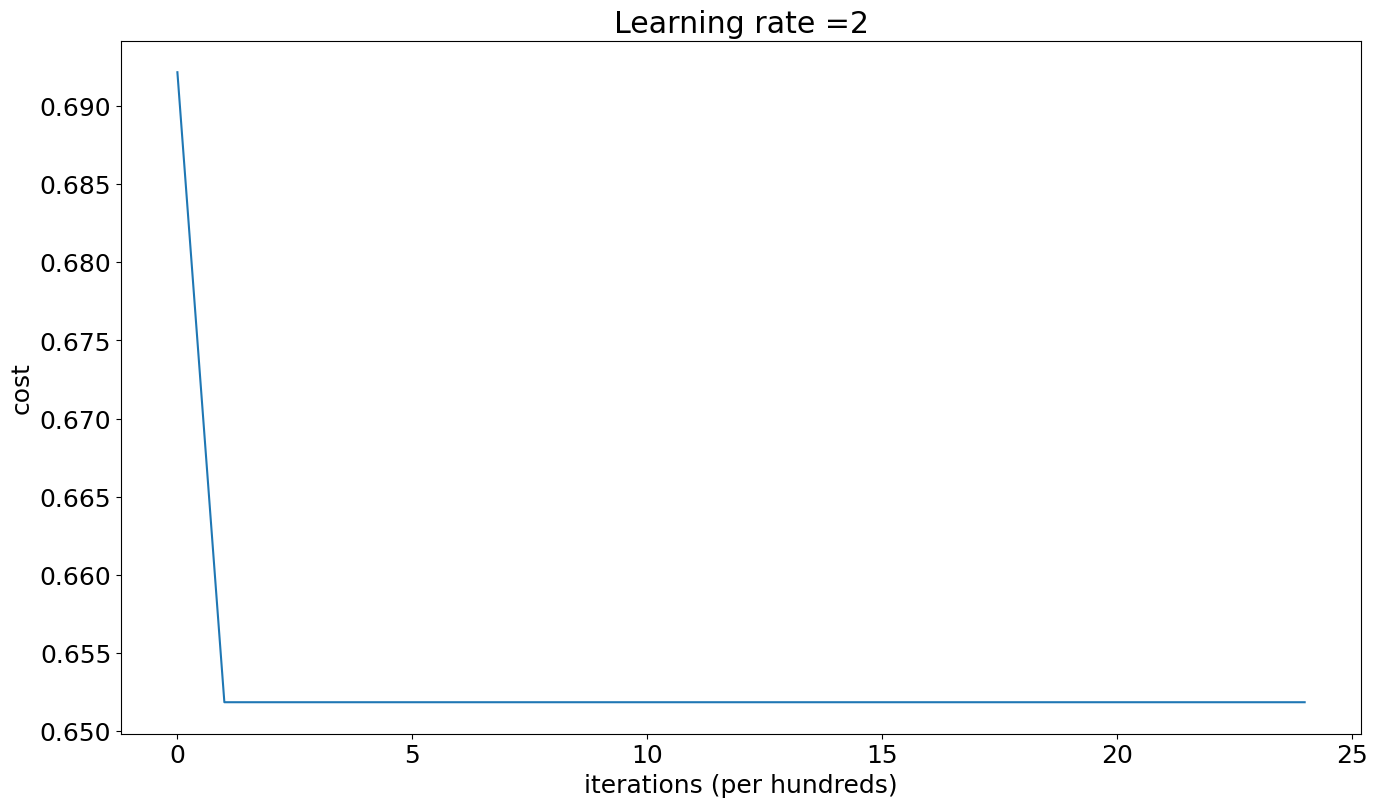

In [246]:
np.random.seed(10)
layers_dims = [2, 2505, 50,1]
print(len(train_set_y))
parameters = L_layer_model(train_set_x, train_set_y, layers_dims, learning_rate=2, num_iterations=2500, print_cost=True)

In [248]:
y_pred = predict(test_set_x, test_set_y, parameters).flatten()
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MSE =', mean_squared_error(y_test, y_pred))
print("Точность на тренировочной выборке:", accuracy_score(y_train, predict(train_set_x, train_set_y, parameters).flatten()) * 100, '%')
print("Точность на тестовой выборке:", accuracy_score(y_test, y_pred) * 100, '%')


MAE = 0.344311377245509
MSE = 0.344311377245509
Точность на тренировочной выборке: 64.27145708582835 %
Точность на тестовой выборке: 65.5688622754491 %


In [250]:
dat = {'y_Actual': y_test, 'y_Predicted': y_pred}
dff = pd.DataFrame(dat, columns=['y_Actual', 'y_Predicted'])
cross_table=pd.crosstab(dff['y_Actual'], dff['y_Predicted'],
                       rownames=['Actual'], colnames=['Predicted'], margins=True)
print(cross_table)

Predicted     0   All
Actual               
0          1095  1095
1           575   575
All        1670  1670
